In [1]:
push!(LOAD_PATH, "../src")
include("../src/lanczos.jl")

using .StochasticLanczos
using SparseArrays
using LinearAlgebra
using FastExpm  # For computing matrix exponentials as a benchmark
using Plots

Import the test case. This includes the sparse matrix A, along with the matrix function f(A) = exp(A), and its exact computation

In [2]:
include("test_case_1.jl");

Now test the implementation of the stochastic Lanczos quadrature by comparing the approximate calculation with the exact calculation of $\Omega^\top f(A)\Omega$ where $\Omega\in \mathbb{R}^{n\times b}$ is a matrix whose columns $\omega_i$ are random samples. Note that $b$ is the block size.

In [3]:
b = 3
Ω = randn(n,b)
# Ω = hcat([ ω/norm(ω) for ω in eachcol(Ω) ]...)

100×3 Matrix{Float64}:
 -0.133208   -0.692246    0.253946
  1.68724    -0.841808   -0.594108
 -0.0482762   0.135208   -1.61189
 -1.06262    -1.48648     0.210419
 -0.210805   -0.370821    0.384337
  0.280728   -0.015506    0.102121
 -1.25986     0.344172   -1.17869
 -0.208129   -0.637938    1.58102
  0.346711   -2.68774     0.557087
  1.24179     0.802627    1.54048
  ⋮                      
 -1.06839    -0.109099   -0.828772
 -0.554458   -0.0809462  -3.44445
 -0.319122   -0.0640879  -0.37013
 -1.27653     0.225232   -0.20693
 -0.851427    0.210436    0.422608
  0.649848    0.748576    2.25674
  0.778887   -0.492644   -1.04936
  1.3269     -0.611456    1.52062
 -2.026      -0.578408   -0.20609

In [4]:
k = 10
T_k = lanczos(matvecA, Ω[:, 1], k)
eigen(T_k).vectors

10×10 Matrix{Float64}:
 -0.113453   -0.309857   0.294961     0.417242   …   0.21774    0.141514
  0.198623    0.438786  -0.3345      -0.267051       0.298588   0.501763
 -0.23124    -0.386046   0.201573    -0.0290606     -0.0181976  0.766122
  0.343849    0.359019  -0.0253236    0.359161      -0.340959   0.365696
 -0.484499   -0.111491  -0.301059    -0.38949       -0.380968   0.0845659
  0.548942   -0.194834   0.355343    -0.157528   …  -0.385948   0.0188974
 -0.393762    0.343082  -0.00821666   0.428973      -0.434083   0.00463585
  0.246756   -0.374206  -0.371969    -0.136374      -0.386975   0.0010543
 -0.142752    0.315373   0.539109    -0.344432      -0.287193   0.000226169
  0.0598429  -0.161071  -0.337435     0.356349      -0.179162   5.16273e-5

In [5]:
test = zeros(n,1)
test[:,1] = Ω[:,1]
T_k, _ = block_lanczos(matvecA, test, 10)
eigen(T_k).vectors

10×10 Matrix{Float64}:
 -0.113453    0.309857   0.294961     0.417242   …  -0.21774    0.141514
  0.198623   -0.438786  -0.3345      -0.267051      -0.298588   0.501763
 -0.23124     0.386046   0.201573    -0.0290606      0.0181976  0.766122
  0.343849   -0.359019  -0.0253236    0.359161       0.340959   0.365696
 -0.484499    0.111491  -0.301059    -0.38949        0.380968   0.0845659
  0.548942    0.194834   0.355343    -0.157528   …   0.385948   0.0188974
 -0.393762   -0.343082  -0.00821666   0.428973       0.434083   0.00463585
  0.246756    0.374206  -0.371969    -0.136374       0.386975   0.0010543
 -0.142752   -0.315373   0.539109    -0.344432       0.287193   0.000226169
  0.0598429   0.161071  -0.337435     0.356349       0.179162   5.16273e-5

In [6]:
k = 5
block_stochastic_lanczos_quadrature(f, matvecA, Ω, k, "single")

7.879568079740497e46

In [7]:
block_stochastic_lanczos_quadrature(f, matvecA, Ω, k, "block")

7.879641407471003e46

In [8]:
exact = tr(Ω'*exactfA*Ω)

7.879652837533805e46 + 0.0im

Plot the convergence of the block Lanczos algorithm to the true block functional quadratic form

In [9]:
k = 4
N = 20
ks = 1:N
lanczos_approx = zeros(N)
for k in ks
    lanczos_approx[k] = block_stochastic_lanczos_quadrature(f, matvecA, Ω, k, "block")
end

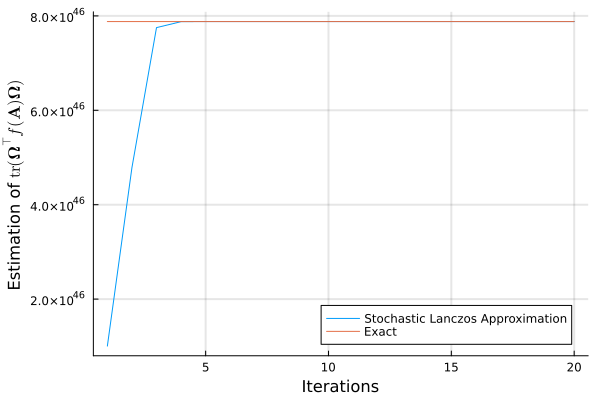

In [10]:
using LaTeXStrings

plot(ks, lanczos_approx, label="Stochastic Lanczos Approximation", xlabel="Iterations", 
    ylabel="Estimation of " * L"\mathrm{tr}(\mathbf{\Omega}^\top f(\mathbf{A})\mathbf{\Omega})", gridlinewidth=2)
plot!(ks, fill(real(exact), N), label="Exact")